<a href="https://colab.research.google.com/github/ImanFatasya/Route-Optimization-of-RapidKL-Bus-using-ACO-Algorithm/blob/main/Route_optimization_of_RapidKL_Bus_using_ACO_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data RapidKL Bus.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extract coordinates and place names
coord_x = data['Latitude'].tolist()
coord_y = data['Longitute'].tolist()
places = data['Place'].tolist()

# Step 1. Initialization of parameters
stop_num = len(coord_x)  # the number of stops
dis = [[0 for _ in range(stop_num)] for _ in range(stop_num)]  # distance matrix
epsilon = 1e-10  # Small value to avoid division by zero

# Calculate the Euclidean distance matrix
for i in range(stop_num):
    for j in range(i, stop_num):
        temp_dis = math.sqrt((coord_x[i] - coord_x[j]) ** 2 + (coord_y[i] - coord_y[j]) ** 2)
        dis[i][j] = temp_dis if temp_dis != 0 else epsilon  # Avoid zero distance
        dis[j][i] = dis[i][j]

# Initialize pheromone matrix
pheromone = [[1 for _ in range(stop_num)] for _ in range(stop_num)]
iter_best = []  # the shortest path of each iteration
best_path = []
best_length = 1e6

# Function to construct a new path
def construct_path(dis, pheromone, alpha, beta):
    path = [0]
    cur_node = 0
    unvisited_stops = [i for i in range(1, len(dis))]
    for _ in range(len(dis) - 1):
        roulette_pooling = []
        for stop in unvisited_stops:
            roulette_pooling.append(math.pow(pheromone[cur_node][stop], alpha) * math.pow(1 / dis[cur_node][stop], beta))
        index = roulette(roulette_pooling)
        cur_node = unvisited_stops[index]
        path.append(cur_node)
        unvisited_stops.pop(index)
    path.append(0)
    return path

# Function to calculate the length of the path
def cal_dis(dis, path):
    length = 0
    for i in range(len(path) - 1):
        length += dis[path[i]][path[i + 1]]
    return length

# Function to select next node using roulette wheel selection
def roulette(roulette_pooling):
    max_value = sum(roulette_pooling)
    pick = random.uniform(0, max_value)
    current = 0
    for i, value in enumerate(roulette_pooling):
        current += value
        if current > pick:
            return i


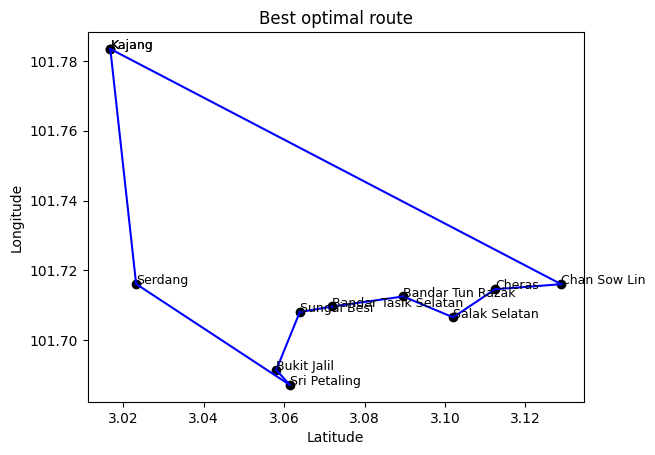

{'Best path': ['Kajang',
  'Serdang',
  'Sri Petaling',
  'Bukit Jalil',
  'Sungai Besi',
  'Bandar Tasik Selatan',
  'Bandar Tun Razak',
  'Salak Selatan',
  'Cheras',
  'Chan Sow Lin',
  'Kajang'],
 'Shortest length': 0.33913248728503775}

In [ ]:
# Parameters for ACO
alpha = 1.0 # influence of pheromone
beta = 5.0 # influence of heuristic information
rho = 0.5 # evaporation rate
Q = 100 # pheromone deposit amount
iterations = 100
pop = 10 # num of ants

# Main ACO loop
for _ in range(iterations):
    ant_path = []
    ant_path_length = []
    for _ in range(pop):
        new_path = construct_path(dis, pheromone, alpha, beta)
        new_length = cal_dis(dis, new_path)
        ant_path.append(new_path)
        ant_path_length.append(new_length)
    iter_best_path_length = min(ant_path_length)
    if iter_best_path_length < best_length:
        best_length = iter_best_path_length
        best_path = ant_path[ant_path_length.index(iter_best_path_length)]
    iter_best.append(best_length)

    # Update pheromone
    for i in range(stop_num):
        for j in range(i, stop_num):
            pheromone[i][j] *= (1 - rho)
            pheromone[j][i] *= (1 - rho)
    for i in range(pop):
        delta = Q / ant_path_length[i]
        path = ant_path[i]
        for j in range(len(path) - 1):
            pheromone[path[j]][path[j + 1]] += delta
            pheromone[path[j + 1]][path[j]] += delta

# Convert best path indices to place names
best_path_places = [places[i] for i in best_path]

# Remove duplicate start node if present
if best_path_places[0] == best_path_places[1]:
    best_path_places.pop(1)

# Ensure the best path starts and ends at the same place
if best_path_places[0] != best_path_places[-1]:
    best_path_places.append(best_path_places[0])

# Plot convergence graph and display shortest distance (best path) obtained
plt.figure()
plt.scatter(coord_x, coord_y, color='black')
for i in range(len(best_path) - 1):
    temp_x = [coord_x[best_path[i]], coord_x[best_path[i + 1]]]
    temp_y = [coord_y[best_path[i]], coord_y[best_path[i + 1]]]
    plt.plot(temp_x, temp_y, color='blue')
for i, place in enumerate(places):
    plt.text(coord_x[i], coord_y[i], place, fontsize=9)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Best optimal route')
plt.show()

result = {'Best path': best_path_places, 'Shortest length': best_length}
result